<a href="https://colab.research.google.com/github/RaneemQaddoura/EvoNP/blob/master/examples/example1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h1>Evolutionary Algorithm with Nearest Point (EvoNP)</h1>
An efficient evolutionary algorithm with a nearest neighbor search technique for clustering analysis

EvoNP is a clustering algorithm which aims at grouping similar data points to the same cluster and dissimilar data points to different clusters. It is based on the evolution behavior of genetic algorithm and the Nearest Neighbor Search (NNS) technique.

<h2>Installation</h2>
Python 3.xx is required

<h2>GitHub</h2>

Clone the Git repository from GitHub:
git clone https://github.com/RaneemQaddoura/EvoNP.git

In [ ]:
!git clone https://github.com/RaneemQaddoura/EvoNP.git

In [ ]:
# Change working directory
import os
os.chdir("EvoNP/")

In [ ]:
#Install NumPy, SciPy, sklearn, pandas, treelib, and matplotlib
!pip install -r requirements.txt

In [ ]:
os.chdir("src")
import EvoNP
from sklearn import metrics
from scipy import spatial
import numpy as np
import os
import warnings
import statistics as stat
import matplotlib.pyplot as plt

warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=RuntimeWarning)


In [ ]:
format = '%m/%d/%y %H:%M:%S'

#initializing variables
directory = "../datasets/" # the directory where the dataset is stored
nChromosomes = 20 #Genetic algorithm parameters: Mating pool size
nGenerations = 50  # The number of Genetic Algorithm Generations
crossoverProbability = 0.8
mutationProbability = 0.001
runs = 3
plot = True

dataset_List = ["VaryDensity.csv","aggregation.csv"]

Dataset: VaryDensity.csv
k: 3
#points: 150
Runs =  0 1 2 

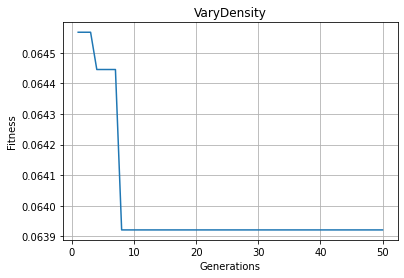


	HS	CS	VM	AMI	ARI	Agg
avg	0.96	0.96	0.96	0.96	0.97	0.96
std	0.01	0.01	0.01	0.01	0.01	0.01
best	0.97	0.97	0.97	0.97	0.98	0.97

Dataset: aggregation.csv
k: 7
#points: 788
Runs =  0 1 2 

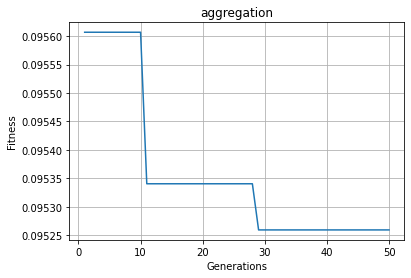


	HS	CS	VM	AMI	ARI	Agg
avg	0.86	0.85	0.85	0.85	0.75	0.83
std	0.04	0.07	0.05	0.05	0.15	0.07
best	0.91	0.91	0.91	0.91	0.9	0.91



In [ ]:
for j in range(len(dataset_List)):
    
    filename = dataset_List[j] #the dataset file name
    
    # Read the dataset file and generate the points list and true values
    data = np.genfromtxt(directory + filename, delimiter=',')
    
    nPoints, nValues = data.shape #Number of points and Number of values for each point
    nValues = nValues - 1 #Dimension value
    k = len(np.unique(data[:,-1]))#k: Number of clusters
    points = data[:,:-1] #list of points
    labelsTrue = data[:,-1] #List of actual cluster of each points (last field)
    
    print("Dataset: " +  str(dataset_List[j]))
    print("k: " + str(k))
    print("#points: " + str(nPoints))
          
    popSize = (nChromosomes,k) # The population will have nChromosomes chromosome where each chromosome has chromosomeLength genes.
    
    HS = [0]*runs     
    CS = [0]*runs
    VM = [0]*runs 
    AMI = [0]*runs 
    ARI = [0]*runs
    Agg = [0]*runs
          
    print("Runs = ", end = " ") 
    for z in range(runs):
        print(str(z), end = " ")
        
        bestChromosomeInAllGenerations, bestLabelsPredInAllGenerations, bestFitnessInAllGenerations, allBestFitness = EvoNP.run(points, nPoints, k, nChromosomes, nGenerations, crossoverProbability, mutationProbability)
            
        
        
        HS[z] = float("%0.2f"%metrics.homogeneity_score(labelsTrue,bestLabelsPredInAllGenerations[bestChromosomeInAllGenerations]))
        CS[z] = float("%0.2f"%metrics.completeness_score(labelsTrue,bestLabelsPredInAllGenerations[bestChromosomeInAllGenerations]))
        VM[z] = float("%0.2f"%metrics.v_measure_score(labelsTrue,bestLabelsPredInAllGenerations[bestChromosomeInAllGenerations]))
        AMI[z] = float("%0.2f"%metrics.adjusted_mutual_info_score(labelsTrue,bestLabelsPredInAllGenerations[bestChromosomeInAllGenerations]))
        ARI[z] = float("%0.2f"%metrics.adjusted_rand_score(labelsTrue,bestLabelsPredInAllGenerations[bestChromosomeInAllGenerations]))
        Agg[z] = float("%0.2f"%(float("%0.2f"%(HS[z] + CS[z] + VM[z] + AMI[z] + ARI[z])) / 5))
     
    allBestFitness[:] = [x / runs for x in allBestFitness]

    if plot:
        # plot fitness progression
        allGenerations = [x+1 for x in range(nGenerations)]
        plt.plot(allGenerations, allBestFitness)
        plt.title(filename[:-4])
        plt.xlabel('Generations')
        plt.ylabel('Fitness')
        plt.grid()
        plt.show()
        plt.clf()
    
    
    avgHomo = str(float("%0.2f"%(sum(HS) / runs)))
    avgComp = str(float("%0.2f"%(sum(CS) / runs)))
    avgVmeas = str(float("%0.2f"%(sum(VM) / runs)))
    avgAMI = str(float("%0.2f"%(sum(AMI) / runs)))
    avgARI = str(float("%0.2f"%(sum(ARI) / runs)))
    avgAgg = str(float("%0.2f"%(sum(Agg) / runs)))
    
    stdHomo = str(float("%0.2f"%stat.stdev(HS)))
    stdComp = str(float("%0.2f"%stat.stdev(CS)))
    stdVmeas = str(float("%0.2f"%stat.stdev(VM)))
    stdAMI = str(float("%0.2f"%stat.stdev(AMI)))
    stdARI = str(float("%0.2f"%stat.stdev(ARI)))
    stdAgg = str(float("%0.2f"%stat.stdev(Agg)))
    
    
    bestHomo = str(float("%0.2f"%max(HS)))
    bestComp = str(float("%0.2f"%max(CS)))
    bestVmeas = str(float("%0.2f"%max(VM)))
    bestAMI = str(float("%0.2f"%max(AMI)))
    bestARI = str(float("%0.2f"%max(ARI)))
    bestAgg = str(float("%0.2f"%max(Agg)))
    
    print()
    print("\tHS\tCS\tVM\tAMI\tARI\tAgg")

    print("avg\t" + 
    avgHomo + "\t" + avgComp + "\t" + avgVmeas + "\t" + 
    avgAMI + "\t" + avgARI+ "\t" + avgAgg)    
    
    print("std\t" + 
    stdHomo + "\t" + stdComp + "\t" + stdVmeas + "\t" + 
    stdAMI + "\t" + stdARI + "\t" + stdAgg)
    
    print("best\t" + 
    bestHomo + "\t" + bestComp + "\t" + bestVmeas + "\t" + 
    bestAMI + "\t" + bestARI + "\t" + bestAgg)
    
    
    print()


<h2>Citing EvoNP</h2>
Qaddoura, R., Faris, H. & Aljarah, I. An efficient evolutionary algorithm with a nearest neighbor search technique for clustering analysis. J Ambient Intell Human Comput (2020). 